# SciPy approach to solving stoichiometry problems.

## Examples taken from:
## <p style="font-style: italic;">Chemical Stoichiometry Using MATLAB</p>


In [1]:
from sympy import init_session
init_session()
import numpy as np
from scipy.linalg import solve

IPython console for SymPy 1.8 (Python 3.9.4-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.8/



Balance:
    
$CH_{4} + O_{2} → CO_{2} + H_{2}O$

First, we mark up the chemical equation:

$x_{1} CH_{4} + x_{2} O_{2} → x_{3} CO_{2} + x_{4} H_{2}O$

Second, we set up a system of linear equations in which the x's make up the columns and elements the rows.

<table align="left">
<tr>
<td>Carbon (C):</td><td>$1 ⋅ x_{1} + 0 ⋅ x_{2} = 1 ⋅ x_{3} + 0 ⋅ x_{4}$</td>
</tr><tr>    
<td>Hydrogen (H):</td><td>$4 ⋅ x_{1} + 0 ⋅ x_{2} = 0 ⋅ x_{3} + 2 ⋅ x_{4}$</td>
</tr><tr>    
<td>Oxygen (O):</td><td>$0 ⋅ x_{1} + 2 ⋅ x_{2} = 2 ⋅ x_{3} + 1 ⋅ x_{4}$</td>
</tr>
</table>

Third, algebraically we rearrange terms so that the RHS for each equation is zero.

<table align="left">
<tr>
<td>Carbon (C):</td><td>$1 ⋅ x_{1} + 0 ⋅ x_{2}  – 1 ⋅ x_{3} + 0 ⋅ x_{4} = 0$</td>
</tr><tr>    
<td>Hydrogen (H):</td><td>$4 ⋅ x_{1} + 0 ⋅ x_{2} + 0 ⋅ x_{3} – 2 ⋅ x_{4} = 0$</td>
</tr><tr>    
<td>Oxygen (O):</td><td>$0 ⋅ x_{1} + 2 ⋅ x_{2} – 2 ⋅ x_{3} – 1 ⋅ x_{4} = 0$</td>
</tr>
</table>







To create four equations in four unknowns, we set

$x_{4} = 1$

$\textbf{Ax} = \textbf{b}$, where:

$\begin{align}
\textbf{A} = \begin{bmatrix}
1 & 0 & -1 & 0\\
4 & 0 & 0 & -2\\
0 & 2 & -2 & -1\\
0 & 0 & 0 & 1
\end{bmatrix},  
\textbf{x} = \begin{bmatrix}
x_{1}\\x_{2}\\x_{3}\\x_{4}
\end{bmatrix},  
\textbf{b} = \begin{bmatrix}
0\\0\\0\\1
\end{bmatrix}
\end{align}$

In [15]:
# A sympy solution
x1, x2, x3, x4 = symbols('x1 x2 x3 x4')
A = Matrix([[1, 0, -1, 0],\
            [4, 0, 0, -2],\
            [0, 2, -2, -1],\
            [0, 0, 0, 1]])
x = (x1, x2, x3, x4) # this is a tuple because of what the linsolve function accepts for input
b = Matrix([0, 0, 0, 1])

In [16]:
system = A, b

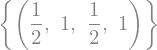

In [17]:
linsolve(system, x)

$CH_{4} + 2O_{2} → CO_{2} + 2H_{2}O$

In [14]:
# A numpy solution
A = np.array([[1, 0, -1, 0],\
              [4, 0, 0, -2],\
              [0, 2, -2, -1],\
              [0, 0, 0, 1]])
b = np.array([0, 0, 0, 1])
x = solve(A, b) # this is the solver from scipy.linalg

In [28]:
x

array([0.5, 1. , 0.5, 1. ])

$\textbf{Conservation of Mass and Charge}$

Balance:
    
$Cr_{2}O_{7}^{2–} + Fe^{2+} + H^{+} → Cr^{3+} + Fe^{3+} + H_{2}O$

First, we mark up the chemical equation:

$x_{1} Cr_{2}O_{7}^{2–} + x_{2} Fe^{2+} + x_{3} H^{+} → x_{4} Cr^{3+} + x_{5} Fe^{3+} + x_{6} H_{2}O$

Second, we set up a system of linear equations in which the x's make up the columns, and elements and charge the rows.

<table align="left">
<tr>
<td>Chromium (Cr):</td><td>$2 ⋅ x_{1} + 0 ⋅ x_{2} + 0 ⋅ x_{3} = 1 ⋅ x_{4} + 0 ⋅ x_{5} + 0 ⋅ x_{6}$</td>
</tr><tr>
<td>Oxygen (O):</td><td>$7 ⋅ x_{1} + 0 ⋅ x_{2} + 0 ⋅ x_{3} = 0 ⋅ x_{4} + 0 ⋅ x_{5} + 1 ⋅ x_{6}$</td>
</tr><tr>
<td>Iron (Fe):</td><td>$0 ⋅ x_{1} + 1 ⋅ x_{2} + 0 ⋅ x_{3} = 0 ⋅ x_{4} + 1 ⋅ x_{5} + 0 ⋅ x_{6}$</td>
</tr><tr>
<td>Hydrogen (H):</td><td>$0 ⋅ x_{1} + 0 ⋅ x_{2} + 1 ⋅ x_{3} = 0 ⋅ x_{4} + 0 ⋅ x_{5} + 2 ⋅ x_{6}$</td>
</tr><tr>
<td>Charge (+):</td><td>$-2 ⋅ x_{1} + 2 ⋅ x_{2} + 1 ⋅ x_{3} = 3 ⋅ x_{4} + 3 ⋅ x_{5} + 0 ⋅ x_{6}$</td>
</tr>
</table>

Third, algebraically we rearrange terms so that the RHS for each equation is zero.

An auxiliary equation setting the value of one coefficient, $x_{6}$, yields six equations in six unknowns:

<table align="left">
<tr>
<td>Chromium (Cr):</td><td>$2 ⋅ x_{1} + 0 ⋅ x_{2} + 0 ⋅ x_{3} - 1 ⋅ x_{4} + 0 ⋅ x_{5} + 0 ⋅ x_{6} = 0$</td>
</tr><tr>
<td>Oxygen (O):</td><td>$7 ⋅ x_{1} + 0 ⋅ x_{2} + 0 ⋅ x_{3} + 0 ⋅ x_{4} + 0 ⋅ x_{5} - 1 ⋅ x_{6} = 0$</td>
</tr><tr>
<td>Iron (Fe):</td><td>$0 ⋅ x_{1} + 1 ⋅ x_{2} + 0 ⋅ x_{3} + 0 ⋅ x_{4} - 1 ⋅ x_{5} + 0 ⋅ x_{6} = 0$</td>
</tr><tr>
<td>Hydrogen (H):</td><td>$0 ⋅ x_{1} + 0 ⋅ x_{2} + 1 ⋅ x_{3} + 0 ⋅ x_{4} + 0 ⋅ x_{5} - 2 ⋅ x_{6} = 0$</td>
</tr><tr>
<td>Charge (+):</td><td>$-2 ⋅ x_{1} + 2 ⋅ x_{2} + 1 ⋅ x_{3} - 3 ⋅ x_{4} - 3 ⋅ x_{5} + 0 ⋅ x_{6} = 0$</td>
</tr><tr>
<td>       (*):</td><td>$0 ⋅ x_{1} + 0 ⋅ x_{2} + 0 ⋅ x_{3} + 0 ⋅ x_{4} + 0 ⋅ x_{5} + 1 ⋅ x_{6} = 1$</td>
</tr>
</table>

$\textbf{Ax} = \textbf{b}$, where:

$\begin{align}
\textbf{A} = \begin{bmatrix}
2 & 0 & 0 & -1 & 0 & 0\\
7 & 0 & 0 &  0 & 0 & -1\\
0 & 1 & 0 & 0 & -1 & 0\\
0 & 0 & 1 & 0 & 0 & -2\\
-2 & 2 & 1 & -3 & -3 & 0\\
0 & 0 & 0 & 0 & 0 & 1
\end{bmatrix},  
\textbf{x} = \begin{bmatrix}
x_{1}\\x_{2}\\x_{3}\\x_{4}\\x_{5}\\x_{6}
\end{bmatrix},  
\textbf{b} = \begin{bmatrix}
0\\0\\0\\0\\0\\1
\end{bmatrix}
\end{align}$

In [10]:
# A sympy solution
x1, x2, x3, x4, x5, x6 = symbols('x1 x2 x3 x4 x5 x6')
A = Matrix([[2, 0, 0, -1, 0, 0],\
            [7, 0, 0, 0, 0, -1],\
            [0, 1, 0, 0, -1, 0],\
            [0, 0, 1, 0, 0, -2],\
            [-2, 2, 1, -3, -3, 0],\
            [0, 0, 0, 0, 0, 1]])
x = (x1, x2, x3, x4, x5, x6) # this is a tuple because of what the linsolve function accepts for input
b = Matrix([0, 0, 0, 0, 0, 1])

In [6]:
system = A, b

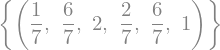

In [7]:
linsolve(system, x)

$Cr_{2}O_{7}^{2–} + 6 Fe^{2+} + 14 H^{+} → 2 Cr^{3+} + 6 Fe^{3+} + 7 H_{2}O$

In [11]:
# A numpy solution
A = np.array([[2, 0, 0, -1, 0, 0],\
            [7, 0, 0, 0, 0, -1],\
            [0, 1, 0, 0, -1, 0],\
            [0, 0, 1, 0, 0, -2],\
            [-2, 2, 1, -3, -3, 0],\
            [0, 0, 0, 0, 0, 1]])
b = np.array([0, 0, 0, 0, 0, 1])
x = solve(A, b) # this is the solver from scipy.linalg

In [12]:
x

array([0.14285714, 0.85714286, 2.        , 0.28571429, 0.85714286,
       1.        ])